In [ ]:
import json

with open("video_frames/summaryJSON.json", "r") as f:
    data = json.load(f)

In [ ]:
object_nums = [len(sd["object_property"]) for sd in data.values()]

In [4]:
max(object_nums)

6

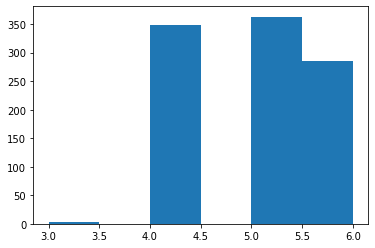

In [6]:
import matplotlib.pyplot as plt
plt.hist(object_nums, bins=6)
plt.show()

In [1]:
from slot_attention import data

In [2]:
from slot_attention.params import SlotAttentionParams
params = SlotAttentionParams()

In [3]:
from slot_attention.utils import rescale
from torchvision import transforms
clevr_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Lambda(rescale),  # rescale between -1 and 1
        transforms.Resize(params.resolution),
    ]
)

In [4]:
cds = data.CLEVERERDataModule(
        data_root=params.data_root,
        max_n_objects=params.num_slots - 1,
        train_batch_size=params.batch_size,
        val_batch_size=params.val_batch_size,
        clevr_transforms=clevr_transforms,
        num_train_images=params.num_train_images,
        num_val_images=params.num_val_images,
        num_workers=params.num_workers,
    )

length of files 40000
length of files 20000


In [7]:
cds

In [5]:
len(cds.train_dataloader())

313

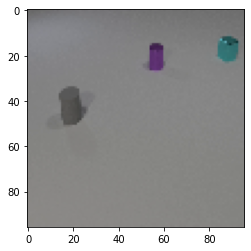

In [69]:
import matplotlib.pyplot as plt

plt.imshow(((cds[535]+1)*0.5).permute(1, 2, 0).numpy())